<a href="https://colab.research.google.com/github/kdw1000/Test/blob/master/_161120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

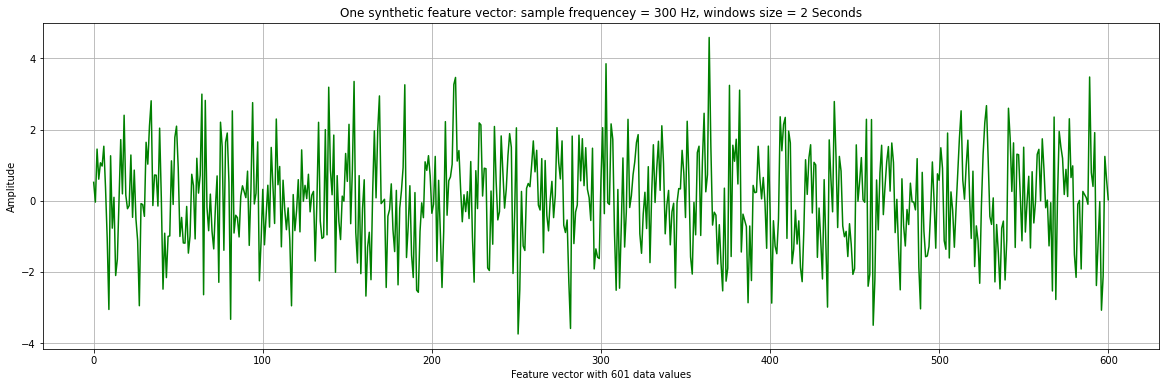

In [ ]:
# [CID 9999] KDW playgound: create a signal ...

%matplotlib inline
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

np.random.seed(1234)

time_step = 0.00333333    # [sec] Sampling period (sampling frequency = 300 Hz)
period = 0.05             # [sec] Signal period (signal frequency = 20 Hz) 

time_vec = np.arange(0, 2, time_step)   # Window size (600 data values / 2 seconds) 

#sig = (np.sin(2 * np.pi / period * time_vec))
#sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))
#sig = (np.sin(2 * np.pi / period * time_vec) + np.sin(2 * np.pi / (period / 5) * time_vec))
sig = (np.sin(2 * np.pi / period * time_vec) + np.sin(2 * np.pi / (period / 5) * time_vec) + 1.1 * np.random.randn(time_vec.size))

fig, ax = plt.subplots(figsize=(20, 6))
ax = plt.axes()
ax.set(title="One synthetic feature vector: sample frequencey = 300 Hz, windows size = 2 Seconds")
plt.ylabel('Amplitude')
plt.xlabel('Feature vector with ' + str(time_vec.shape[0]) + ' data values')
plt.xticks((0, 100, 200, 300, 400, 500, 600))
plt.plot(sig, linestyle='-', color='green')
plt.grid(True, axis='both')
plt.show()

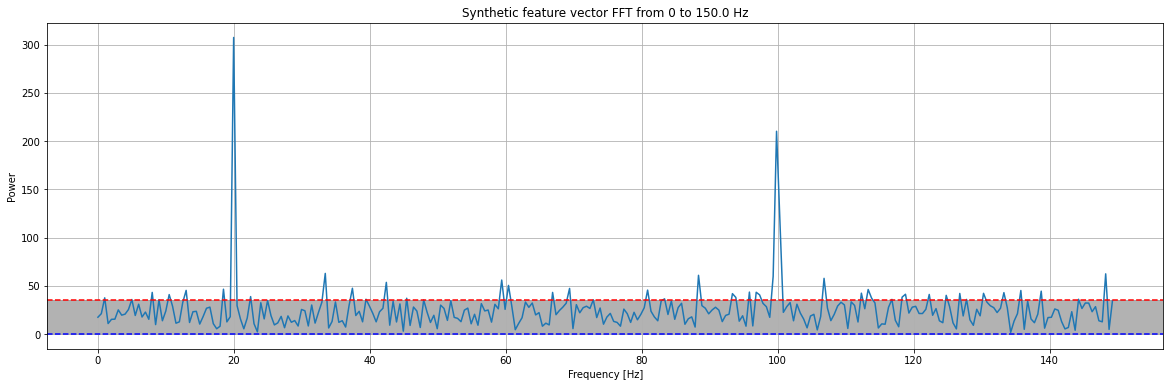

Max Power = 307.0 for f = 20.0 Hz


In [ ]:
# [CID 9998] KDW playgound: FFT for the synthetic signal ...

sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

i = int(time_vec.shape[0] / 2)

fig, ax = plt.subplots(figsize=(20, 6))
ax = plt.axes()
plt.plot(sample_freq[:i:], power[:i:])
ax.set(title="Synthetic feature vector FFT from 0 to " + str(np.round_(max(sample_freq))) + ' Hz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
ax.axhline(35, color='red', linestyle='--')
ax.axhline(0, color='blue', linestyle='--')
ax.axhspan(35, 0, color='grey', alpha=0.6)
plt.grid(True, axis='both')
plt.show()

print ('Max Power = ' + str(np.round_(max(power))) + ' for f = ' + str(np.round_(sample_freq[np.argmax(power, axis=0)])) + ' Hz')

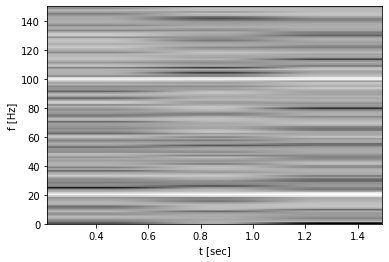

In [ ]:
# [CID 9997] KDW playgound: spectrogram with FFT data...

Pxx, freqs, bins, im = plt.specgram(sig, Fs=1/time_step, cmap='gray')#, vmin=minval, vmax=minval)    
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.show()

In [ ]:
# [CID 0001] Read CSV file with daily shift usage log (DSU Log) ...

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#url = 'https://ssv-comm.de/forum/dokumente/dsulog-250820.csv'
url = "dsulog24_181220.txt"

names=["Datum", "Freq", "Max.Power"]
dsu=pd.read_csv(url, header=None, names=names, parse_dates=True, sep=',')
#dsu["Datum"]=pd.to_datetime(dsu["Datum"], unit='ms')
dsu["Datum"]=pd.to_datetime(dsu["Datum"])                   # ISO 8061 time stamp
dsu.index=dsu["Datum"]
del dsu["Datum"]
print(dsu.head(10))
print(':')
print(dsu.tail(10))
print(' ')
print(dsu.describe())
print(dsu.isnull().sum().sum())

                      Freq    Max.Power
Datum                                  
2020-12-18 13:59:36   90.0   982.635197
2020-12-18 13:59:37   53.0  1000.196210
2020-12-18 13:59:39  228.0   957.707688
2020-12-18 13:59:40  111.0  1151.562890
2020-12-18 13:59:41   93.0  1426.076055
2020-12-18 13:59:42  125.0  1029.737525
2020-12-18 13:59:43   60.0  1020.908351
2020-12-18 13:59:44   50.0  1088.145136
2020-12-18 13:59:46  105.0  1006.553986
2020-12-18 13:59:47  125.0  1045.124719
:
                      Freq    Max.Power
Datum                                  
2020-12-18 14:57:48   14.0  1146.974169
2020-12-18 14:57:49   86.0   990.918105
2020-12-18 14:57:50  189.0  1365.778789
2020-12-18 14:57:52  114.0   946.174068
2020-12-18 14:57:53  181.0  1100.516920
2020-12-18 14:57:54   94.0  2226.861927
2020-12-18 14:57:55  110.0  1782.694319
2020-12-18 14:57:56  110.0  3311.706830
2020-12-18 14:57:57  102.0  1443.029352
2020-12-18 14:57:59  232.0  1054.658015
 
              Freq     Max.Power
cou

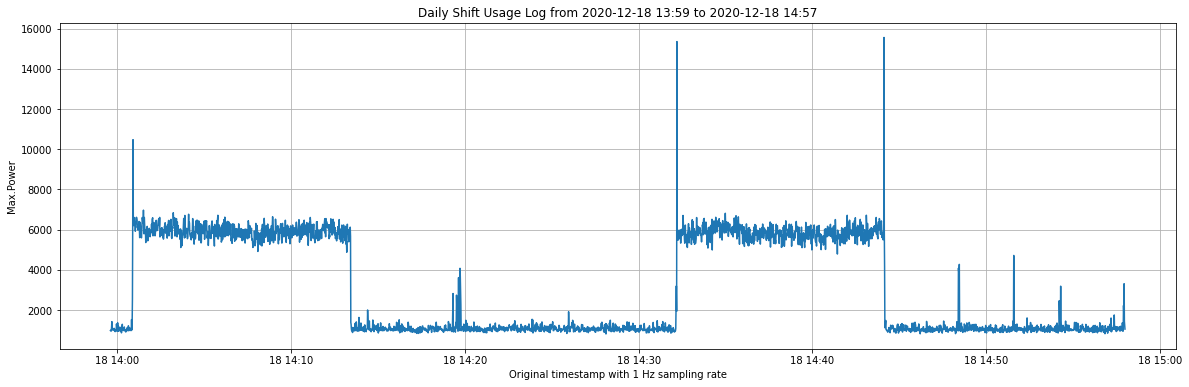

In [ ]:
# [CID 0002] Plot daily shift usage log ...

dsuRS = dsu

start_time_str = dsu.index[0]
start_time = str(start_time_str.strftime('%Y-%m-%d %H:%M'))
end_time_str = dsu.index[dsu.shape[0]-1]
end_time = str(end_time_str.strftime('%Y-%m-%d %H:%M'))

fig, ax = plt.subplots(figsize=(20, 6))
ax = plt.axes()
ax.set(title="Daily Shift Usage Log from " + start_time + " to " + end_time)
plt.xlabel('Original timestamp with 1 Hz sampling rate')
plt.ylabel('Max.Power')
plt.plot(dsuRS["Max.Power"])
plt.grid()
plt.show()


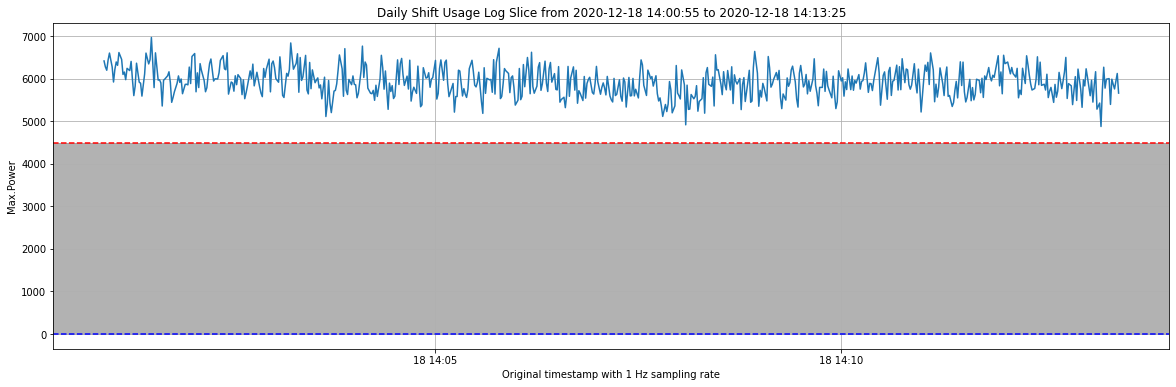

In [ ]:
# [CID 0003] Plot slice of daily shift usage log

SLstart = '2020-12-18 14:00:55'      # 16:26:30 or 16:29:30
SLend   = '2020-12-18 14:13:25'      # 16:28:30 or 16:35:00
cutoff  = 4500

dsuSl=dsuRS[SLstart:SLend]
fig, ax = plt.subplots(figsize=(20, 6))
ax = plt.axes()
ax.set(title="Daily Shift Usage Log Slice from " + SLstart + " to " + SLend)
plt.xlabel('Original timestamp with 1 Hz sampling rate')
plt.ylabel('Max.Power')
plt.plot(dsuSl["Max.Power"])
ax.axhline(cutoff, color='red', linestyle='--')
ax.axhline(0, color='blue', linestyle='--')
ax.axhspan(cutoff, 0, color='grey', alpha=0.6)
plt.grid()
plt.show()

In [ ]:
# [CID 0004] Count rows with Max.Power greater than a trigger value (pandas version) ...

dsuSlON = dsuSl[dsuSl["Max.Power"] > cutoff]
print(dsuSlON.describe())

             Freq    Max.Power
count  641.000000   641.000000
mean   199.909516  5920.244579
std      4.286380   338.140245
min    100.000000  4878.668698
25%    200.000000  5663.405616
50%    200.000000  5903.248954
75%    200.000000  6174.688973
max    242.000000  6971.956412


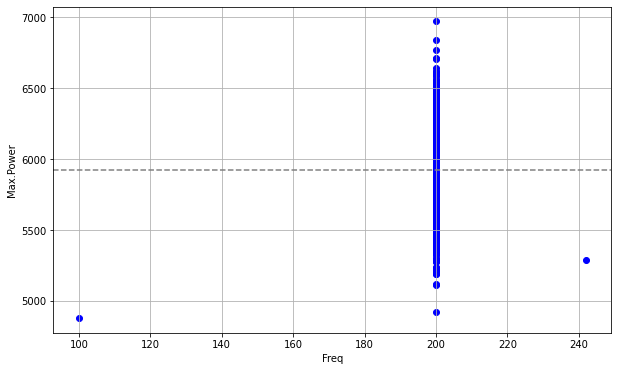

count      2.000000
mean     171.000000
std      100.409163
min      100.000000
25%      135.500000
50%      171.000000
75%      206.500000
max      242.000000
Name: Freq, dtype: float64


In [ ]:
# [CID 0005] Scatter plot: visualize the variance / standard deviation

plt.figure(figsize=(10,6))
ax= plt.axes()
plt.xlabel('Freq')
plt.ylabel('Max.Power')
plt.scatter(dsuSlON["Freq"], dsuSlON["Max.Power"], c= "b", alpha= 1.0) 
ax.axhline(dsuSlON["Max.Power"].mean(), color='grey', linestyle='--')
plt.grid(True)
plt.show()

dsuSlON = dsuSl[dsuSl["Freq"] != 200]
print(dsuSlON["Freq"].describe())

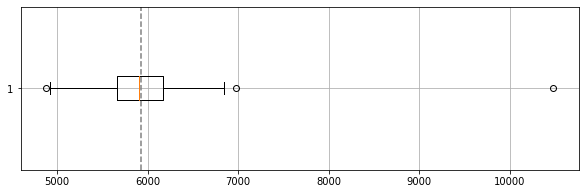

Variance = 18.344399570375323


In [ ]:
# [CID 0006] Box plot "Freq": visualize the variance / standard deviation

#plt.figure(figsize=(3,6))
plt.figure(figsize=(10,3))
ax= plt.axes()
#ax.set_title('Freq', size=14, color='blue')
ax.boxplot(dsuSlON["Max.Power"], vert=False)
#ax.boxplot(dsuSlON["Max.Power"])
#ax.boxplot(dsuSlON["Freq"], vert=False)
ax.axvline(dsuSlON["Max.Power"].mean(), color='grey', linestyle='--')
ax.grid()
plt.show()
print("Variance = " + str(dsuSlON["Freq"].var()))

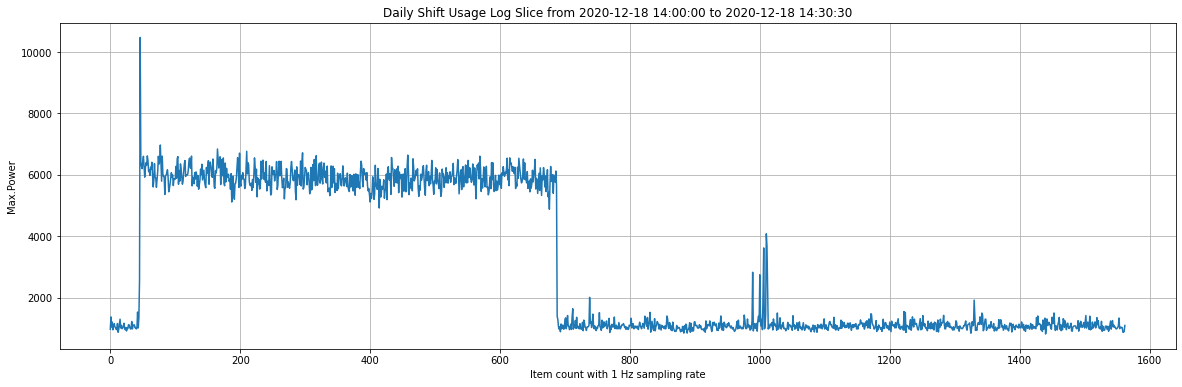

(1563, 2)


In [ ]:
# [CID 0007] Count rows with Max.Power greater than a trigger value (numpy version) ...

import numpy as np  

i = 0
dsuON = np.empty((0,2), float)
while i in range(dsuSl.shape[0]):
    #if dsuSl.iloc[i,1] > cutoff:
    dsuON = np.append(dsuON, np.array([[dsuSl.iloc[i,0], dsuSl.iloc[i,1]]]), axis=0)
    i += 1  

fig, ax = plt.subplots(figsize=(20, 6))
ax = plt.axes()
ax.set(title="Daily Shift Usage Log Slice from " + SLstart + " to " + SLend)
#plt.xlabel('Timestamp after resampling to [1min] with mean values')
plt.xlabel('Item count with 1 Hz sampling rate')
plt.ylabel('Max.Power')
plt.plot(dsuON[:,[1]])   # try also "plt.plot(dsuON[:,[0,1]])" 
plt.grid()
plt.show()
print(dsuON.shape)

In [ ]:
# [CID 0008] Numpy array with data ...

#dsuON[200:220,[0]]
dsuON[210:230,[0,1]]

array([[ 200.        , 6768.69775815],
       [ 200.        , 6031.48058393],
       [ 200.        , 6394.86344281],
       [ 200.        , 6322.90740943],
       [ 200.        , 5779.90305744],
       [ 200.        , 5660.34508483],
       [ 200.        , 5648.95963866],
       [ 200.        , 5727.95583408],
       [ 200.        , 5494.11407498],
       [ 200.        , 5848.96464377],
       [ 200.        , 5584.99601111],
       [ 200.        , 5993.70740091],
       [ 200.        , 6552.50562149],
       [ 200.        , 6256.29887623],
       [ 200.        , 5755.70487206],
       [ 200.        , 6184.03322199],
       [ 200.        , 5282.33190765],
       [ 200.        , 5899.01530687],
       [ 200.        , 5700.53082897],
       [ 200.        , 5839.35396652]])

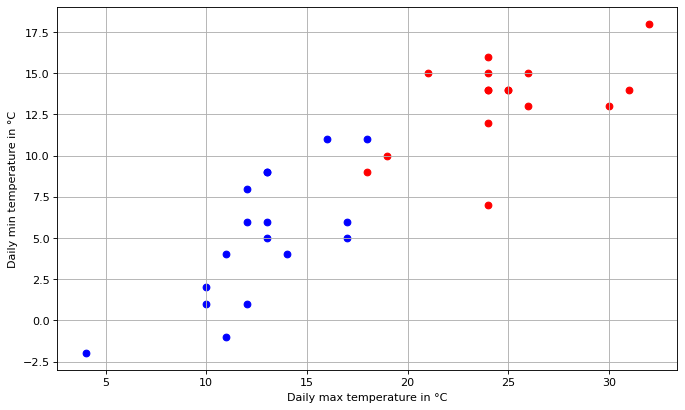

In [ ]:
# [CID 0009] exploratory data analysis (what does my data look like?) ...

import numpy as np
summer= np.array([[24,16], [21,15], [24,14], [25,14], [25,14], [26,13], [30,13], 
                  [31,14], [32,18], [24,14], [24,12], [19,10], [18,9],  [24,7],  
                  [24,15], [26,15]])

winter= np.array([[11,4], [12,6], [11,-1], [12,1],  [12,8],  [17,5], [17,6], 
                  [14,4], [13,6], [13,9],  [16,11], [18,11], [13,9], [13,5],
                  [10,2], [10,1], [4,-2]])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(summer[:,0], summer[:,1], c= "r", alpha= 1.0)
plt.scatter(winter[:,0], winter[:,1], c= "b", alpha= 1.0)
plt.xlabel('Daily max temperature in \xb0C')
plt.ylabel('Daily min temperature in \xb0C')
plt.grid(True)
plt.show()


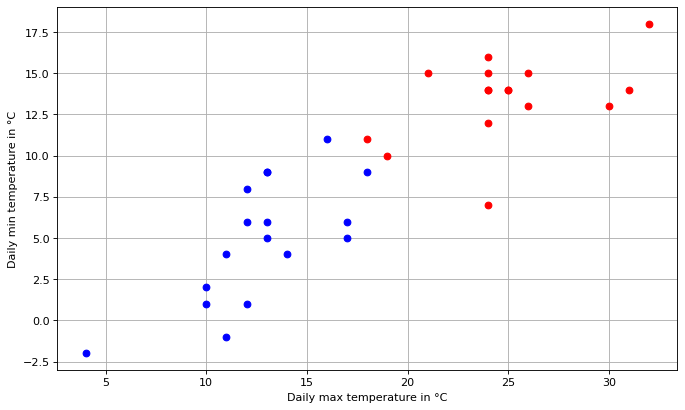

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
# [CID 0010] unsupervised machine learning example (k-means clustering) ...

import numpy as np
X= np.array([[4,-2],  [21,15], [13,5],  [24,14], [12,1],  [25,14], [17,5],
             [25,14], [31,14], [18,11], [32,18], [18,9],  [24,12], [13,6],
             [19,10], [24,15], [11,-1], [26,15], [11,4],  [12,6],  [12,8],  
             [26,13], [17,6],  [24,7],  [14,4],  [24,14], [13,9],  [16,11],  
             [13,9],  [24,16], [10,2],  [10,1],  [30,13]])

from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_pred= kmeans.predict(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=80)
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        plt.plot(X[i,0], X[i,1], "ro", alpha= 1.0)
    if y_pred[i] == 1:
        plt.plot(X[i,0], X[i,1], "bo", alpha= 1.0)
    if y_pred[i] == 2:
        plt.plot(X[i,0], X[i,1], "mo", alpha= 1.0)
    if y_pred[i] == 3:
        plt.plot(X[i,0], X[i,1], "go", alpha= 1.0)
plt.xlabel('Daily max temperature in \u00b0C')
plt.ylabel('Daily min temperature in \u00b0C')
plt.grid(True)
plt.show()

y= np.array(y_pred).reshape(len(y_pred), 1);
data= np.append(X, y, axis=1)
np.savetxt("data.csv", data, delimiter=';', fmt='%d')
y_pred

In [ ]:
# ... use direkt after [CID 0010]

print(kmeans.predict(np.array([[13.5,2.75]])))

[1]


In [ ]:
# [CID 0011] supervised machine learning example (MLP) ...

import numpy as np
X= np.array([[24,16], [21,15], [24,14], [25,14], [25,14], [26,13], [30,13], 
             [31,14], [32,18], [24,14], [24,12], [19,10], [18,9],  [24,7],
             [24,15], [26,15], [11,4],  [12,6],  [11,-1], [12,1],  [12,8], 
             [17,5],  [17,6],  [14,4],  [13,6],  [13,9],  [16,11], [18,11], 
             [13,9],  [13,5],  [10,2],  [10,1],  [4,-2]])

y= np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn import neural_network
clf= neural_network.MLPClassifier(hidden_layer_sizes=(10, 5, 10))
#clf= neural_network.MLPClassifier(hidden_layer_sizes=(10))
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

import pickle
with open('inference.pkl', 'wb') as fid:
    pickle.dump(clf, fid)   
    
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0

In [ ]:
# ... use direkt after [CID 0011]

import pickle
with open('inference.pkl', 'rb') as fid:
    clf = pickle.load(fid)

import numpy as np
print("Class: {}".format(clf.predict(np.array([[25.5,11.75]]))))


FileNotFoundError: ignored

In [ ]:
# [CID 1001] Upload CSV file with daily shift usage log (DSU Log) ...

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('Uploaded file "{name}" OK.'.format(name=fn))
url = '{name}'.format(name=fn)

Saving dsulog24_181220.txt to dsulog24_181220.txt
Uploaded file "dsulog24_181220.txt" OK.


In [ ]:
# [CID 1002] Read CSV file with daily shift usage log (DSU Log) ...

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

url = '{name}'.format(name=fn)
#url = "dsulog24_111220.txt"

names=["Datum", "Freq", "Max.Power"]
dsu=pd.read_csv(url, header=None, names=names, parse_dates=True, sep=',')
#dsu["Datum"]=pd.to_datetime(dsu["Datum"], unit='ms')
dsu["Datum"]=pd.to_datetime(dsu["Datum"])                   # ISO 8061 time stamp
dsu.index=dsu["Datum"]
del dsu["Datum"]
print(dsu.head(10))
print(':')
print(dsu.tail(10))
print(' ')
print(dsu.describe())
print(dsu.isnull().sum().sum())

                      Freq    Max.Power
Datum                                  
2020-12-18 13:59:36   90.0   982.635197
2020-12-18 13:59:37   53.0  1000.196210
2020-12-18 13:59:39  228.0   957.707688
2020-12-18 13:59:40  111.0  1151.562890
2020-12-18 13:59:41   93.0  1426.076055
2020-12-18 13:59:42  125.0  1029.737525
2020-12-18 13:59:43   60.0  1020.908351
2020-12-18 13:59:44   50.0  1088.145136
2020-12-18 13:59:46  105.0  1006.553986
2020-12-18 13:59:47  125.0  1045.124719
:
                      Freq    Max.Power
Datum                                  
2020-12-18 14:57:48   14.0  1146.974169
2020-12-18 14:57:49   86.0   990.918105
2020-12-18 14:57:50  189.0  1365.778789
2020-12-18 14:57:52  114.0   946.174068
2020-12-18 14:57:53  181.0  1100.516920
2020-12-18 14:57:54   94.0  2226.861927
2020-12-18 14:57:55  110.0  1782.694319
2020-12-18 14:57:56  110.0  3311.706830
2020-12-18 14:57:57  102.0  1443.029352
2020-12-18 14:57:59  232.0  1054.658015
 
              Freq     Max.Power
cou

# Neuer Abschnitt